# Basic example KT3D OK, IDpower and NN estimate 

This example shows how to obtain simultaneous ordinary kriging, inverse to the power of the distance and nearest neighbor estimates using ``pygslib.gslib.KT3D``.


In [1]:
# import third party python libraries
import matplotlib.pylab as plt
# make plots inline
%matplotlib inline

In [2]:
# import pygslib
import pygslib
import numpy as np

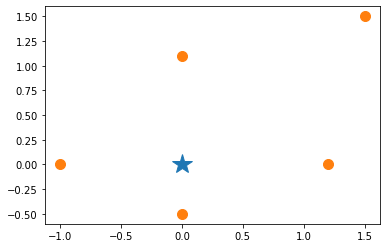

In [3]:
# target point
xc = np.array([0])
yc = np.array([0])
zc = np.array([0])

# data
x = np.array([1.5,1.2,0,-1,0])
y = np.array([1.5,0,1.1,0,-0.5])
z = np.array([0,0,0,0, 0])
vr = np.array([1,2,3,4,5])
bhid = np.array([1,2,3,4,5])

# see points location
plt.plot (xc,yc, '*', markersize=20)
plt.plot (x,y, 'o',  markersize=10)


In [4]:
# creating parameter dictionary for estimation in one point
kt3d_Parameters = {
            # Input Data 
            # ----------
            'x' : x, 
            'y' : y,
            'z' : z,
            'vr' : vr,
            # Output (Target point) 
            # ----------
            'nx' : 1,  
            'ny' : 1,  
            'nz' : 1, 
            'xmn' : 0,  
            'ymn' : 0,  
            'zmn' : 0,  
            'xsiz' : 1,  
            'ysiz' : 1,   
            'zsiz' : 1, 
            'nxdis' : 1,  
            'nydis' : 1,  
            'nzdis' : 1,  
            'outx' : xc,
            'outy' : yc,
            'outz' : zc,
            # Search parameters 
            # ----------
            'radius'     : 850,   
            'radius1'    : 850,   
            'radius2'    : 250,   
            'sang1'      : -28,  
            'sang2'      : 34,   
            'sang3'      : 7,   
            'ndmax'      : 12,    
            'ndmin'      : 1,  
            'noct'       : 0,
            # Kriging parameters and options 
            # ----------
            'ktype'      : 1,   # 1 Ordinary kriging 
            'idbg'       : 0,   # 0 no debug 
            # ID power parameter
            'id2power'   :2.0,   # the power applied to the inverse of the distance
            # Variogram parameters 
            # ----------
            'c0'         : 0.35,    
            'it'         : [2,2],    
            'cc'         : [0.41,0.23], 
            'aa'         : [96,1117],   
            'aa1'        : [96,1117],  
            'aa2'        : [96,300],   
            'ang1'       : [-28,-28],   
            'ang2'       : [ 34, 34],  
            'ang3'       : [  7,  7]} 

In [5]:
# estimating
estimate, debug, summary = pygslib.gslib.kt3d(kt3d_Parameters)

In [6]:
print (estimate)

{'x': array([0]), 'y': array([0]), 'z': array([0]), 'outidpower': array([4.1657987], dtype=float32), 'outnn': array([5.], dtype=float32), 'outest': array([3.0942636], dtype=float32), 'outkvar': array([0.43245965], dtype=float32), 'outlagrange': array([-0.06698406], dtype=float32)}


In [7]:
print ("NN estimate :", estimate['outnn'])
print ("ID2 estimate :", estimate['outidpower'])
print ("OK estimate :", estimate['outest'])

NN estimate : [5.]
ID2 estimate : [4.1657987]
OK estimate : [3.0942636]
